<a href="https://colab.research.google.com/github/student-Nit/CP-progress-Tracker/blob/main/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn imbalanced-learn matplotlib seaborn


In [2]:
import pandas as pd

df = pd.read_csv("/content/fraudTest.csv")
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
print(df["is_fraud"].value_counts())

is_fraud
0    370466
1      1717
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["amt"] = scaler.fit_transform(df["amt"].values.reshape(-1,1))

X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Drop non-numerical columns before applying SMOTE
X_numerical = X.select_dtypes(include=['number'])

X_res, y_res = smote.fit_resample(X_numerical, y)
print(y_res.value_counts())

is_fraud
0    370466
1    370466
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
print("Model Trained Successfully!")


Model Trained Successfully!


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[74044   150]
 [   17 73976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74194
           1       1.00      1.00      1.00     73993

    accuracy                           1.00    148187
   macro avg       1.00      1.00      1.00    148187
weighted avg       1.00      1.00      1.00    148187



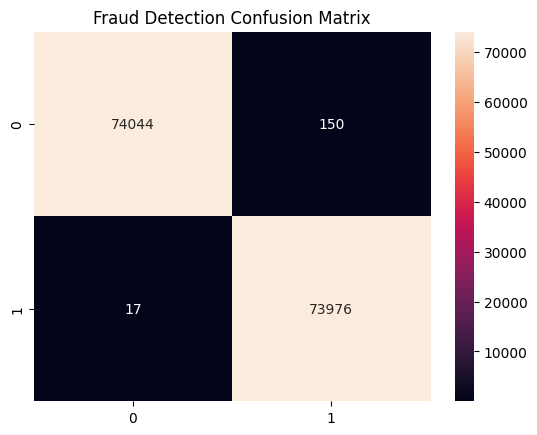

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Fraud Detection Confusion Matrix")
plt.show()


In [13]:
sample = X_test.iloc[0].values.reshape(1,-1)
result = model.predict(sample)

print("Fraud Transaction" if result[0]==1 else "Legitimate Transaction")


Legitimate Transaction


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
